In [33]:
from tensorflow.keras.layers import *
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import Callback
from tensorflow.keras.optimizers import *
from tensorflow.keras.models import load_model
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import os
import zipfile

In [4]:
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/validation-horse-or-human.zip \
    -O /content/validation-horse-or-human.zip

--2020-07-31 05:26:40--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/validation-horse-or-human.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 172.217.204.128, 172.217.203.128, 172.253.123.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.217.204.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 11480187 (11M) [application/zip]
Saving to: ‘/content/validation-horse-or-human.zip’

/content/validation 100%[===================>]  10.95M  --.-KB/s    in 0.1s    

2020-07-31 05:26:40 (111 MB/s) - ‘/content/validation-horse-or-human.zip’ saved [11480187/11480187]



In [5]:
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/horse-or-human.zip \
    -O /content/horse-or-human.zip

--2020-07-31 05:26:48--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/horse-or-human.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 173.194.217.128, 172.217.204.128, 172.217.203.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|173.194.217.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 149574867 (143M) [application/zip]
Saving to: ‘/content/horse-or-human.zip’

/content/horse-or-h 100%[===================>] 142.65M   195MB/s    in 0.7s    

2020-07-31 05:26:49 (195 MB/s) - ‘/content/horse-or-human.zip’ saved [149574867/149574867]



In [6]:
train_zip = '/content/horse-or-human.zip'
train_dir = '/content/horse-or-human'


with zipfile.ZipFile(train_zip, 'r') as zip_ref:
    zip_ref.extractall(train_dir)

In [7]:
valid_zip = '/content/validation-horse-or-human.zip'
valid_dir = '/content/validation-horse-or-human'


with zipfile.ZipFile(valid_zip, 'r') as zip_ref:
    zip_ref.extractall(valid_dir)

In [17]:
class mycallback(Callback):
  def on_epoch_end(self, epoch, logs={}):
    if (logs.get('accuracy') > 0.95):
      self.model.stop_training = True
      print('95% accuracy reached')

callback = mycallback()

In [19]:
model.compile(loss='binary_crossentropy', optimizer=RMSprop(0.001), metrics=['accuracy'])

In [26]:
from PIL import Image

In [94]:
def create_dataset(path, shape,mode='rgb'):
  numiter = 0
  imgList = []
  ylist = []
  for i in os.listdir(path):
    sub_path = os.path.join(path, i)
    print(i)
    for j in os.listdir(sub_path):
      pic_path = os.path.join(sub_path, j)
      if mode == 'grayscale':
        img = Image.open(pic_path).convert('L')
      elif mode == 'rbg':
        img = Image.open(pic_path)
      img = img.resize((shape))
      data = np.array(img)
      #Since PIL returns a color channel of 4 (RGBA where A is the transparency) but you want 3 color channels (RBG), you can just slice the A channel off
      data = data[:,:,:3]
      imgList.append(data)
      if i == 'horses':
        ylist.append(1)
      elif i =='humans':
        ylist.append(0)
      numiter += 1

  imgList = np.array(imgList)
  ylist = np.array(ylist)
  print(numiter)
  
  return imgList, ylist

x_train, y_train = create_dataset('/content/horse-or-human', (300,300), mode='rbg')

humans
horses
1027


In [95]:
y_train

array([0, 0, 0, ..., 1, 1, 1])

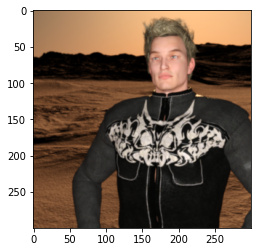

In [96]:
plt.imshow(x_train[0])

(300, 300, 3)

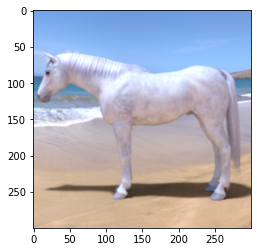

In [107]:
#Testing PIL library on one image

img = Image.open('/content/horse-or-human/horses/horse01-2.png')
img = img.resize((300,300))
data = np.array(img)
data = data[:,:,:3]
plt.imshow(data)
data.shape

In [98]:
x_train.shape

(1027, 300, 300, 3)

In [99]:
model = tf.keras.models.Sequential([
    Conv2D(16, (3,3), activation='relu', input_shape=(300, 300, 3)),
    MaxPooling2D(2, 2),
    Conv2D(32, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(1, activation='sigmoid')
])

model.compile(loss='binary_crossentropy', optimizer = tf.keras.optimizers.RMSprop(0.001), metrics=['accuracy'])

In [100]:
history = model.fit(x_train, y_train,  epochs=30, verbose = 1, callbacks=[callback])

Epoch 1/30
33/33 [==============================] - 84s 3s/step - loss: 27.3446 - accuracy: 0.6105
Epoch 2/30
33/33 [==============================] - 84s 3s/step - loss: 0.5738 - accuracy: 0.8549
Epoch 3/30
33/33 [==============================] - 84s 3s/step - loss: 0.6499 - accuracy: 0.8491
Epoch 4/30
33/33 [==============================] - 85s 3s/step - loss: 0.7141 - accuracy: 0.8569
Epoch 5/30
33/33 [==============================] - 83s 3s/step - loss: 0.3651 - accuracy: 0.9318
Epoch 6/30
33/33 [==============================] - 84s 3s/step - loss: 0.4092 - accuracy: 0.9474
Epoch 7/30
33/33 [==============================] - 83s 3s/step - loss: 0.9070 - accuracy: 0.9377
Epoch 8/30
33/33 [==============================] - 83s 3s/step - loss: 0.1875 - accuracy: 0.9698


In [108]:
import numpy as np
from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()

for fn in uploaded.keys():
  img = Image.open(fn)
  img = img.resize((300,300))
  data = np.array(img)
  data = data[:,:,:3]
  #Change from (300,300,3) to (1,300,300,3)
  data = np.expand_dims(data,axis=0)
  pred_class = model.predict(data)[0,0]
  if pred_class >0.5:
    print('Predicted Horse!')
  else:
    print('Predicted Human!')
  

Saving horze.jpg to horze.jpg
Predicted Horse!


In [102]:
img = Image.open('/content/horse-or-human/humans/human01-05.png')
img = img.resize((300,300))
data = np.array(img)
data = data[:,:,:3]
#change from (300,300,3) to (1,300,300,3)
data = np.expand_dims(data,axis=0)
model.predict(data)[0,0]

0.93714

In [ ]:
#Horse = 1
#Human = 0

In [103]:
y_train

array([0, 0, 0, ..., 1, 1, 1])